In [112]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
file_path = os.path.abspath('Data/Iris.csv')
warnings.filterwarnings('ignore')


In [113]:
# pip install scikit-learn==1.3.0

# Loading Dataset

In [114]:
df=pd.read_csv(file_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
# Delteing the column Id as it is not required
df=df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [118]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing Dataset

In [119]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Analysis

<Axes: >

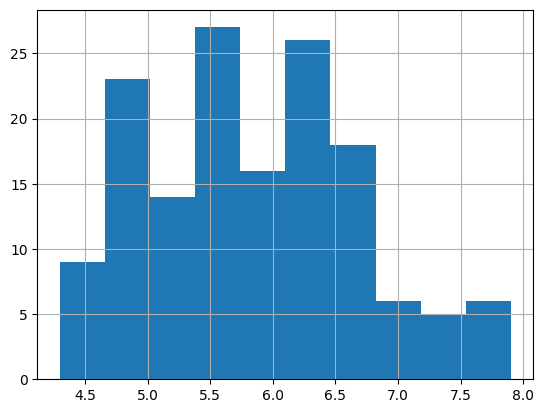

In [120]:
df['SepalLengthCm'].hist()

<Axes: >

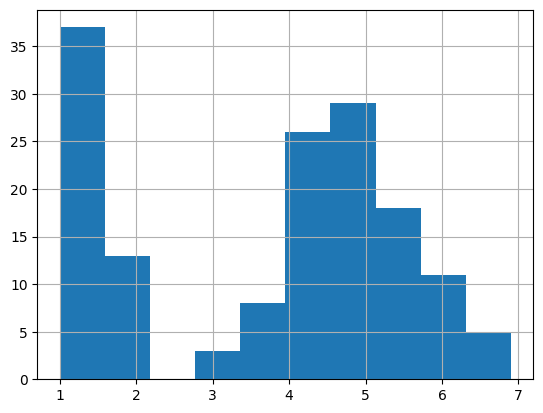

In [121]:
df['PetalLengthCm'].hist()

<Axes: >

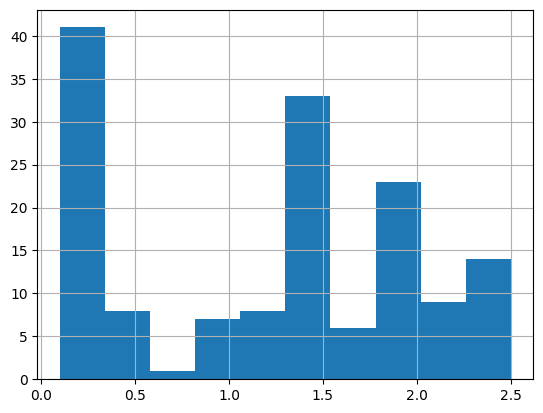

In [122]:
df['PetalWidthCm'].hist()

In [123]:
color=['red','blue','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

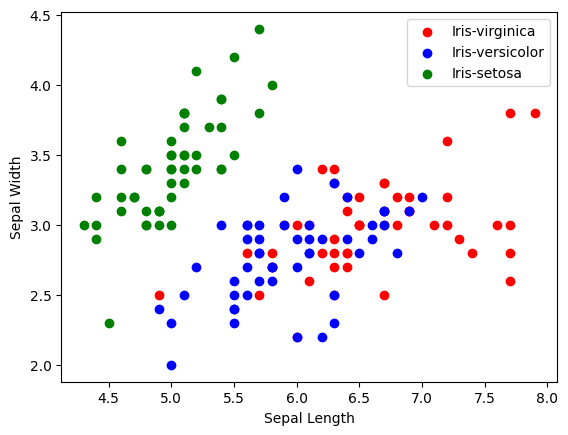

In [124]:
for i in range(3):
    
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

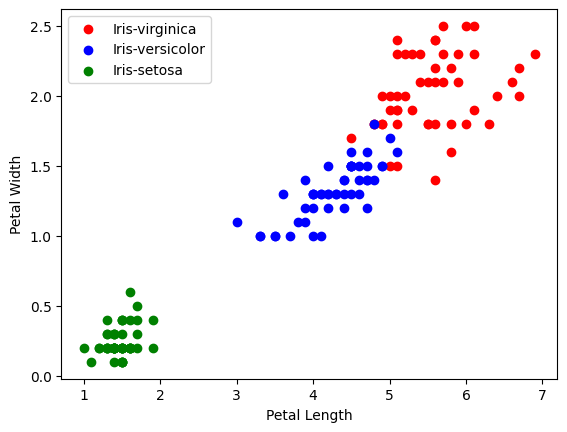

In [125]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=color[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

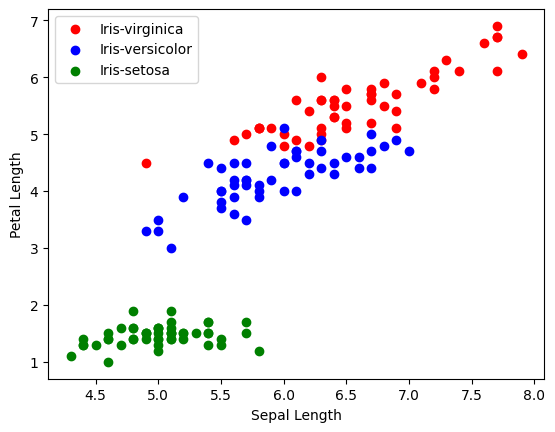

In [126]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=color[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

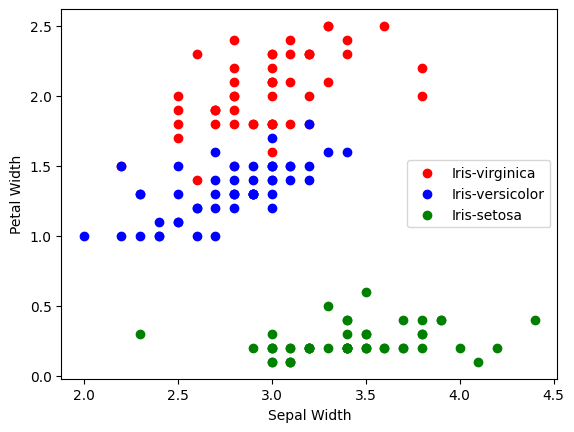

In [127]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=color[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Corelation Matrix

In [128]:
corr=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

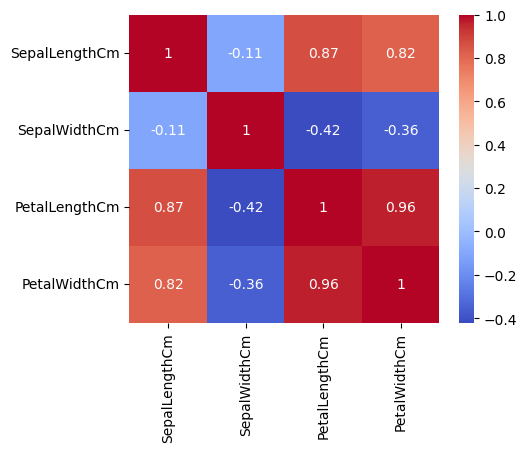

In [129]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

# Model Training and Testing

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle as pk

#input data
X=df.drop(columns=['Species'])
#output data
Y=df['Species']
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [131]:
#Logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)
print("LogisticRegression model accuracy:",model.score(x_test,y_test)*100)

LogisticRegression model accuracy: 88.88888888888889


In [132]:
# Model Training
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [133]:
# Print metric to get performance
print("Accuracy", model.score(x_test,y_test)*100)

Accuracy 88.88888888888889


In [134]:
# K-nearest Neigbours
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print("KNeighborsClassifier model accuracy:",model.score(x_test,y_test)*100)

KNeighborsClassifier model accuracy: 95.55555555555556


In [135]:
# Model Training
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [136]:
print("Accuracy", model.score(x_test,y_test)*100)

Accuracy 95.55555555555556


In [137]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print("DecisionTreeClassifier model Accuracy:",model.score(x_test,y_test)*100)

DecisionTreeClassifier model Accuracy: 88.88888888888889


In [138]:
#Model Training
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [139]:
print("Accuracy",model.score(x_test,y_test)*100)

Accuracy 88.88888888888889


In [140]:
# save the model
import pickle as pk
filename = 'finalized_model.sav'
pk.dump(model,open(filename,'wb'))

In [141]:
import pickle as pk

In [142]:
filename='finalized_model.sav'
try:
    with open(filename,'wb') as file:
        pk.dump(model,file)
        print("Model saved successfully")
except Exception as e:
    print("Error in saving the model",e)

Model saved successfully


In [143]:
load_model=pk.load(open(filename,'rb'))

In [144]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

In [145]:
import sklearn
print(sklearn.__version__)

1.3.0


In [146]:
load_model.predict([[4,4,5,3]])

array(['Iris-virginica'], dtype=object)